# International football results

## About Dataset
### Context
Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

### Content
This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2023. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

results.csv includes the following columns:

date - date of the match
home_team - the name of the home team
away_team - the name of the away team
home_score - full-time home team score including extra time, not including penalty-shootouts
away_score - full-time away team score including extra time, not including penalty-shootouts
tournament - the name of the tournament
city - the name of the city/town/administrative unit where the match was played
country - the name of the country where the match was played
neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
shootouts.csv includes the following columns:

date - date of the match
home_team - the name of the home team
away_team - the name of the away team
winner - winner of the penalty-shootout
goalscorers.csv includes the following columns:

date - date of the match
home_team - the name of the home team
away_team - the name of the away team
team - name of the team scoring the goal
scorer - name of the player scoring the goal
own_goal - whether the goal was an own-goal
penalty - whether the goal was a penalty
Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading the dataset
df_results = pd.read_csv('results.csv', parse_dates=['date'], index_col='date')
df_results.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
df_shootouts = pd.read_csv('shootouts.csv', parse_dates=['date'], index_col='date')
df_shootouts.head()

,home_team,away_team,winner
date,,,
1967-08-22,India,Taiwan,Taiwan
1971-11-14,South Korea,Vietnam Republic,South Korea
1972-05-07,South Korea,Iraq,Iraq
1972-05-17,Thailand,South Korea,South Korea
1972-05-19,Thailand,Cambodia,Thailand


In [4]:
df_goalscorers = pd.read_csv('goalscorers.csv', parse_dates=['date'], index_col='date')
df_goalscorers.head()

,home_team,away_team,team,scorer,minute,own_goal,penalty
date,,,,,,,
1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


## EDA for results.csv

In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44557 entries, 1872-11-30 to 2023-03-29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   44557 non-null  object
 1   away_team   44557 non-null  object
 2   home_score  44557 non-null  int64 
 3   away_score  44557 non-null  int64 
 4   tournament  44557 non-null  object
 5   city        44557 non-null  object
 6   country     44557 non-null  object
 7   neutral     44557 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 2.8+ MB


In [6]:
df_results.describe()

,home_score,away_score
count,44557.000000,44557.000000
mean,1.739278,1.178401
std,1.747263,1.393775
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [7]:
df_results.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

### Agregate the winner of each match

In [8]:
df_results['winner'] = np.where(df_results['home_score'] > df_results['away_score'], df_results['home_team'], df_results['away_team'])
df_results.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
date,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,England
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Scotland
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


### Numeric and Object columns

In [9]:
df_results_num = df_results.select_dtypes(include=['int64'])
df_results_num.head()

,home_score,away_score
date,,
1872-11-30,0,0
1873-03-08,4,2
1874-03-07,2,1
1875-03-06,2,2
1876-03-04,3,0


In [10]:
df_results_obj = df_results.select_dtypes(include=['object'])
df_results_obj.head()

,home_team,away_team,tournament,city,country,winner
date,,,,,,
1872-11-30,Scotland,England,Friendly,Glasgow,Scotland,England
1873-03-08,England,Scotland,Friendly,London,England,England
1874-03-07,Scotland,England,Friendly,Glasgow,Scotland,Scotland
1875-03-06,England,Scotland,Friendly,London,England,Scotland
1876-03-04,Scotland,England,Friendly,Glasgow,Scotland,Scotland


In [11]:
columns_num = df_results_num.columns
columns_num

Index(['home_score', 'away_score'], dtype='object')

In [12]:
columns_obj = df_results_obj.columns
columns_obj

Index(['home_team', 'away_team', 'tournament', 'city', 'country', 'winner'], dtype='object')

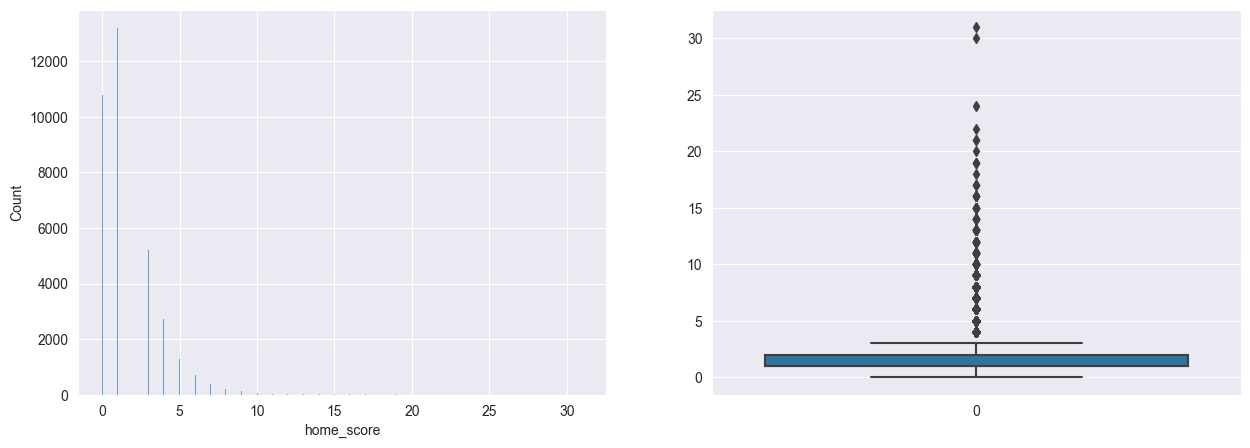

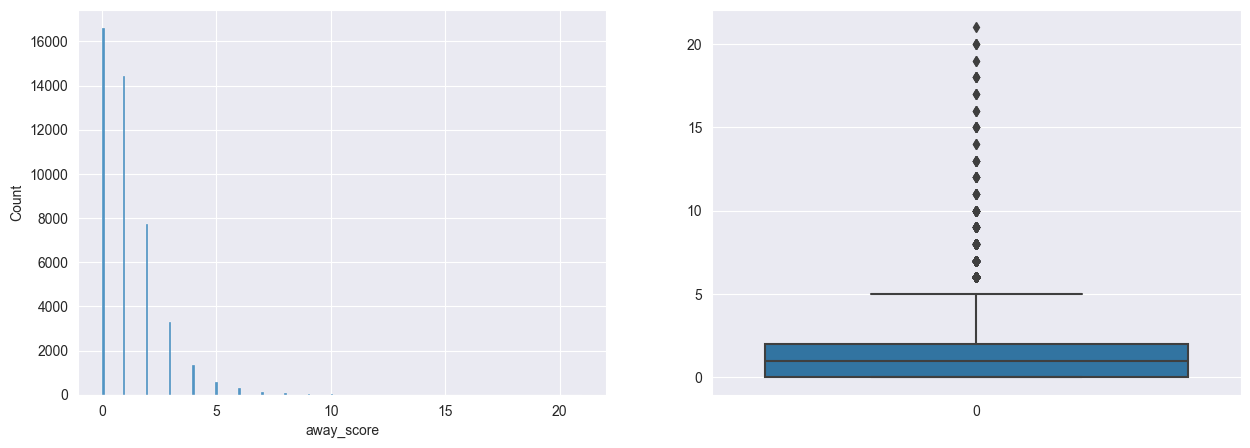

In [13]:
def plot_num(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[col], ax=ax[0])
    sns.boxplot(df[col], ax=ax[1])
    plt.show()

for col in columns_num:
    plot_num(df_results_num, col)


### Correlation

In [14]:
df_results_corr = df_results_num.corr()
df_results_corr

,home_score,away_score
home_score,1.000000,-0.138503
away_score,-0.138503,1.000000


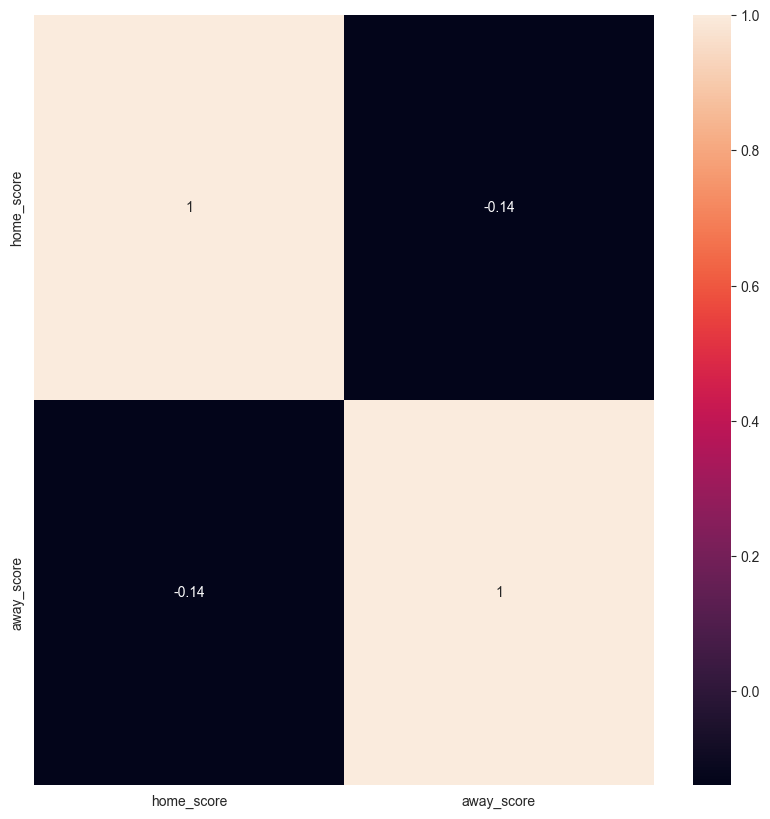

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_results_corr, annot=True, ax=ax)
plt.show()

## Data Visualization over time
### Plots for the average home score and away score over time

In [16]:
yearly_scores = df_results.groupby(df_results.index.year)[['home_score', 'away_score']].mean()
yearly_scores.head()

,home_score,away_score
date,,
1872,0.0,0.0
1873,4.0,2.0
1874,2.0,1.0
1875,2.0,2.0
1876,3.5,0.0


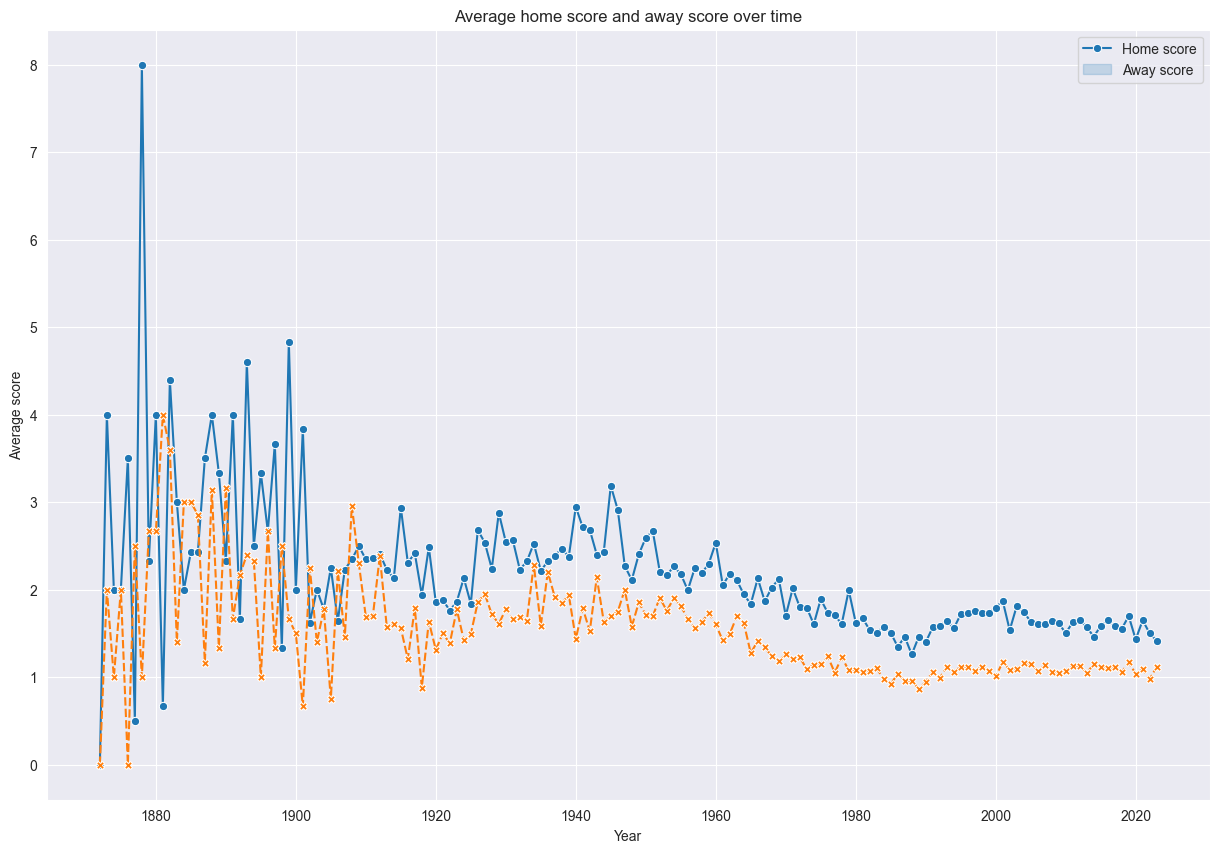

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=yearly_scores, ax=ax, markers=True)
plt.title('Average home score and away score over time')
plt.xlabel('Year')
plt.ylabel('Average score')
plt.legend(['Home score', 'Away score'])
plt.show()

### Bar plot for the total number of matches played each year

In [18]:
matches_per_year = df_results.groupby(df_results.index.year)['home_team'].count().tail(20)
matches_per_year.head()

date
2004    1077
2005     798
2006     832
2007     976
2008    1102
Name: home_team, dtype: int64

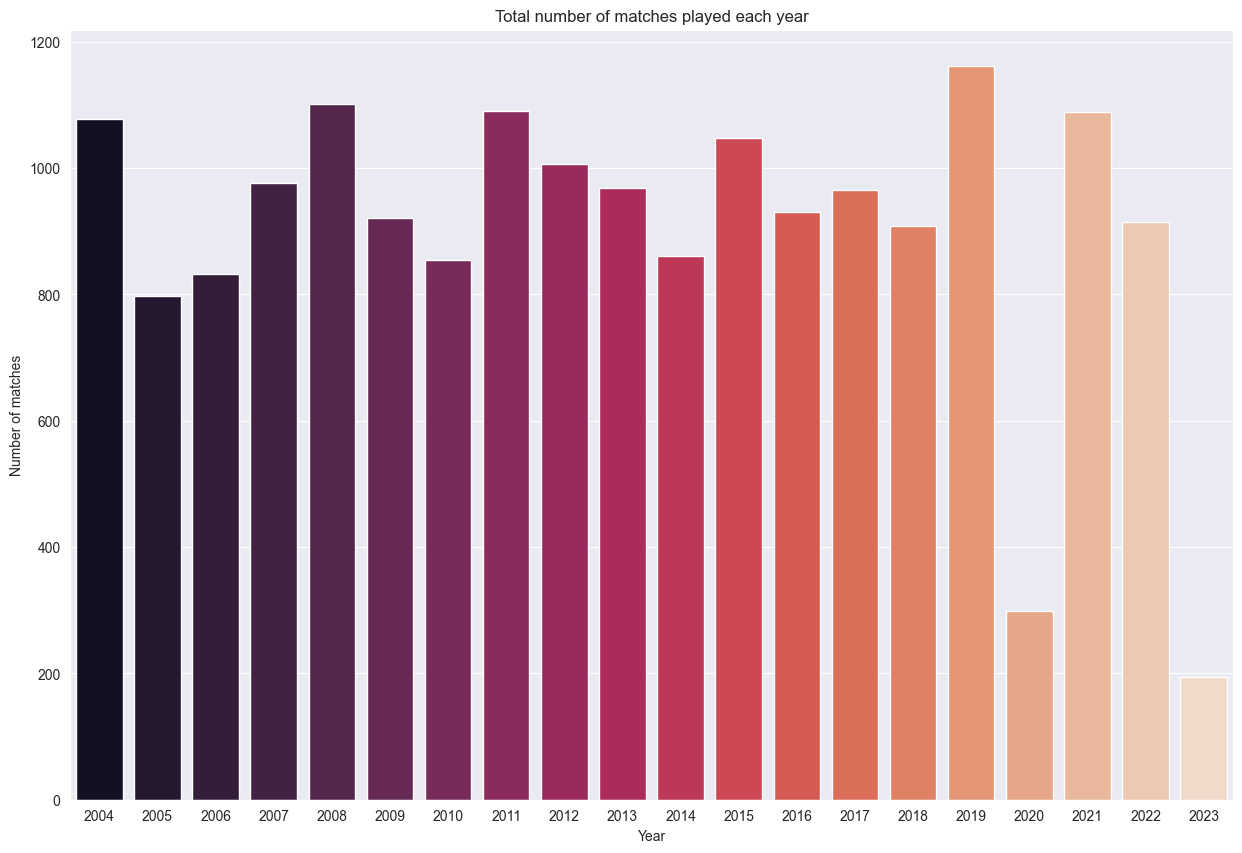

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=matches_per_year.index, y=matches_per_year.values, ax=ax, palette='rocket')
plt.title('Total number of matches played each year')
plt.xlabel('Year')
plt.ylabel('Number of matches')
plt.show()

### Who is the best team of all time.

In [43]:
df = pd.read_csv('results.csv', parse_dates=['date'], index_col='date')
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [44]:
df["draw"] = np.where(df["home_score"] == df["away_score"], 1, 0)
df["winner"] = np.where(df["home_score"] > df["away_score"], df["home_team"], df["away_team"])
df["loser"] = np.where(df["home_score"] < df["away_score"], df["home_team"], df["away_team"])
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,draw,winner,loser
date,,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1,England,England
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0,England,Scotland
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0,Scotland,England
1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1,Scotland,Scotland
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0,Scotland,England


In [86]:
df_copy = df.copy()
df_copy.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,draw,winner,loser
date,,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1,England,England
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0,England,Scotland
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0,Scotland,England
1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1,Scotland,Scotland
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0,Scotland,England


Drop the ties

In [87]:
df_copy = df_copy[df_copy["draw"] == 0]
df_copy.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,draw,winner,loser
date,,,,,,,,,,,
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0,England,Scotland
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0,Scotland,England
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0,Scotland,England
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,0,Scotland,Wales
1877-03-03,England,Scotland,1,3,Friendly,London,England,False,0,Scotland,England


In [88]:
team_wins = df_copy["winner"].value_counts()
team_wins.head()

Brazil       656
England      599
Germany      575
Argentina    557
Sweden       521
Name: winner, dtype: int64

In [89]:
teams_losses = df_copy["loser"].value_counts()
teams_losses.head()


Finland             417
Switzerland         356
Northern Ireland    347
Norway              337
Luxembourg          333
Name: loser, dtype: int64

### Who is the best team of all time.
Plot

In [90]:
team_results = pd.DataFrame(columns=["wins", "losses"])
team_results["wins"] = team_wins
team_results["losses"] = teams_losses
team_results = team_results.head(10)
team_results.head(10)

,wins,losses
Brazil,656,162.0
England,599,201.0
Germany,575,207.0
Argentina,557,214.0
Sweden,521,309.0
South Korea,478,195.0
Mexico,478,244.0
Hungary,455,301.0
Italy,446,159.0
France,444,250.0


In [91]:
top_10 = team_results.head(10).index
top_10

Index(['Brazil', 'England', 'Germany', 'Argentina', 'Sweden', 'South Korea',
       'Mexico', 'Hungary', 'Italy', 'France'],
      dtype='object')

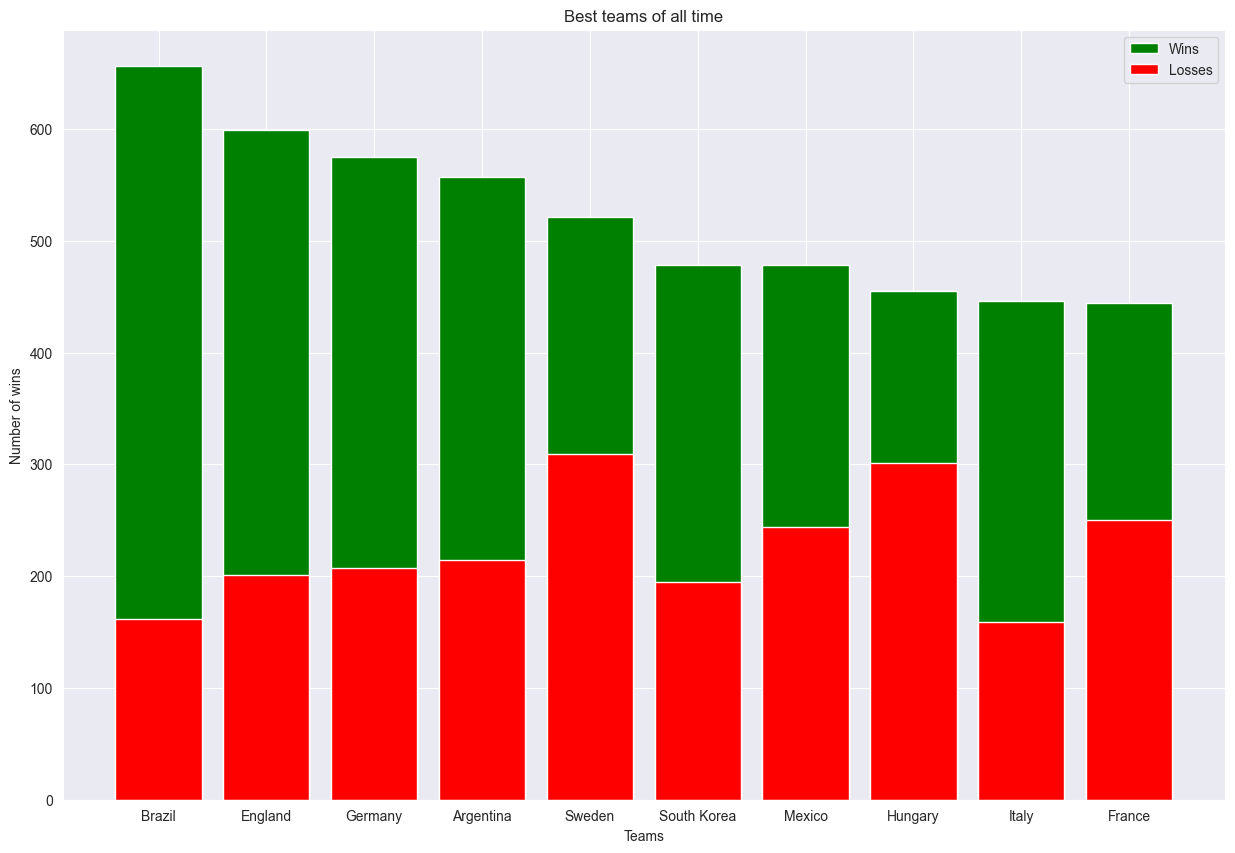

In [92]:
ax, fig = plt.subplots(figsize=(15, 10))
plt.bar(team_results.index, team_results["wins"], color="green")
plt.bar(team_results.index, team_results["losses"], color="red")
plt.title("Best teams of all time")
plt.xlabel("Teams")
plt.ylabel("Number of wins")
plt.legend(["Wins", "Losses"])
plt.show()

### Plotting by year

In [93]:
df_copy.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,draw,winner,loser
date,,,,,,,,,,,
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0,England,Scotland
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0,Scotland,England
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0,Scotland,England
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,0,Scotland,Wales
1877-03-03,England,Scotland,1,3,Friendly,London,England,False,0,Scotland,England


In [94]:
df_copy["year"] = df_copy.index.year
df_copy.head()


,home_team,away_team,home_score,away_score,tournament,city,country,neutral,draw,winner,loser,year
date,,,,,,,,,,,,
1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0,England,Scotland,1873
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0,Scotland,England,1874
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0,Scotland,England,1876
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,0,Scotland,Wales,1876
1877-03-03,England,Scotland,1,3,Friendly,London,England,False,0,Scotland,England,1877


In [131]:
team_wins = df_copy.groupby("year")["winner"].value_counts()
# Rename winer column index to team
team_wins.index.names = ["year", "team"]
team_wins.head()


year  team    
1873  England     1
1874  Scotland    1
1876  Scotland    2
1877  Scotland    2
1878  Scotland    2
Name: winner, dtype: int64

In [132]:
teams_losses = df_copy.groupby("year")["loser"].value_counts()
# Rename loser column index to team
teams_losses.index.names = ["year", "team"]
teams_losses.head()

year  team    
1873  Scotland    1
1874  England     1
1876  England     1
      Wales       1
1877  England     1
Name: loser, dtype: int64

Plot

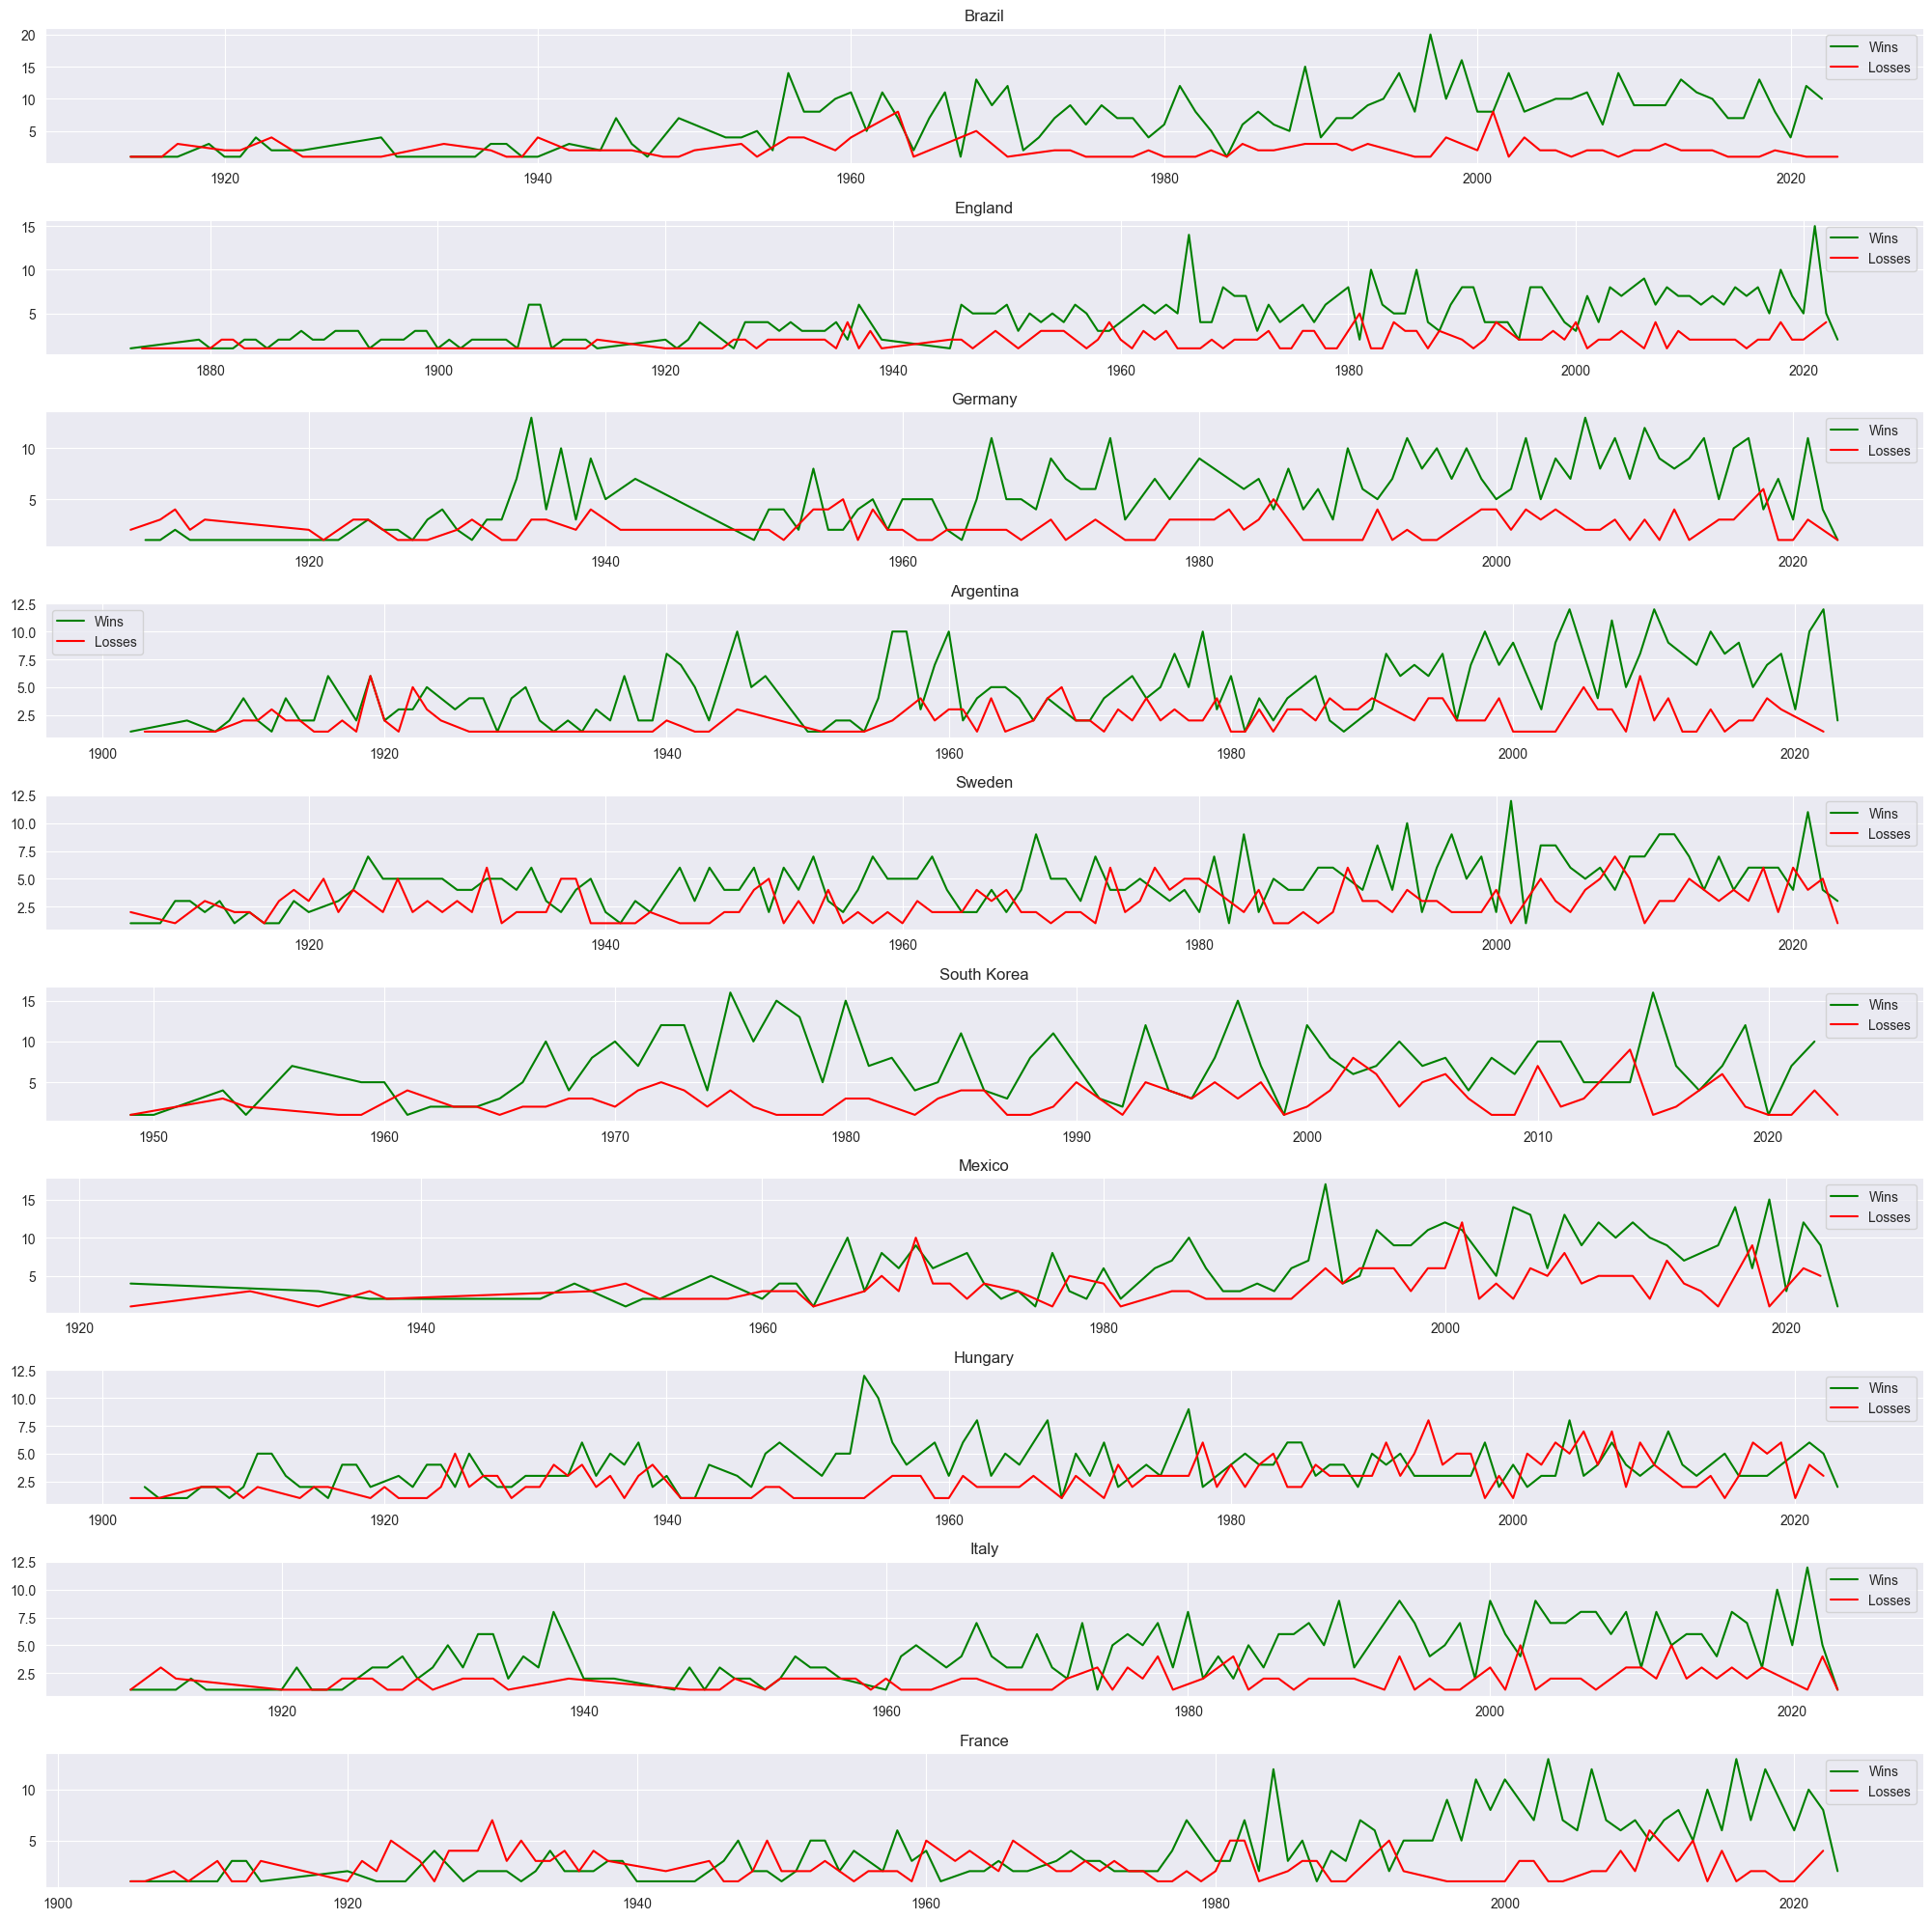

In [140]:
axs, fig = plt.subplots(figsize=(20, 20), nrows = len(top_10), ncols = 1)
for i, team in enumerate(top_10):
    team_wins.loc[:, team].plot(ax=fig[i], color="green")
    teams_losses.loc[:, team].plot(ax=fig[i], color="red")
    fig[i].set_title(team)
    fig[i].set_xlabel("")
    fig[i].set_ylabel("")
    fig[i].legend(["Wins", "Losses"])
plt.tight_layout()
plt.show()
